# PartII: How do Amenities relate to the Prices of the listings?

In this notebook we are going to see how amenities affect the prices of the listings. For this we'll be using the AirBnb datasets for the two US cities Boston and Seattle. We are using the two cities data to draw comparisons if the trends are similar or follow a different pattern.


In [6]:
#importing necessary libraries
import numpy as np
import pandas as pd
import utilities as u
import matplotlib.pyplot as plt

#reading csv files into data frames for the two cities Boston and Seattle. (Data Gathering)
df_seattle = pd.read_csv('./SEATTLE/listings.csv')
df_boston = pd.read_csv('./BOSTON/listings.csv')

In [7]:
#removing text columns from the dataframes as they are out of scope for further analysis. (Data Cleaning)
df_bost_clean = df_boston.drop(['id','listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered','transit', 
                'neighborhood_overview','notes','access','thumbnail_url','host_url','medium_url',
                'picture_url', 'house_rules','interaction','xl_picture_url','host_id','host_name','host_location',
                'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
                 'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

df_seat_clean = df_seattle.drop(['id','listing_url','scrape_id','last_scraped','name',
                'summary','space','description','experiences_offered','transit', 
         'neighborhood_overview','notes','thumbnail_url','host_url','medium_url',
        'picture_url','xl_picture_url','host_id','host_name','host_location',
        'host_about','host_thumbnail_url','host_picture_url', 'street','state','zipcode', 'market',
         'smart_location','country_code','country','license', 'jurisdiction_names'], axis=1)

In [4]:
#convert amount columns into numeric value for conducting further analysis. (Data Cleaning)
df_bost = u.convert_amount(df_bost_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])
df_seat = u.convert_amount(df_seat_clean.copy(), ['security_deposit','price','monthly_price','cleaning_fee','weekly_price', 'extra_people'])

# Amenities into separate Amentity Columns for each dataset. (Data Preparation)

The 'amenities' exist as a single column in the dataset. It'll be good to have a particular amenity as separate column with boolean value indicating it's presence for that listing.

The 'separare_col' function is called which returns modified dataframe with amenities separated into column and list of all the amenities.

In [5]:
#separating amenities into separate column
df_final_bost, amenities_list_bost = u.seperate_col('amenities',df_bost.copy(),',')
df_final_seat, amenities_list_seat = u.seperate_col('amenities',df_seat.copy(),',')


/home/piyush/UDACITY/DATASCIENCENANODEGREEPROGRAM/Projects/AIRBNB/utilities.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_'+col][i] = len(columns)
/home/piyush/UDACITY/DATASCIENCENANODEGREEPROGRAM/Projects/AIRBNB/utilities.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][i] = True
/home/piyush/UDACITY/DATASCIENCENANODEGREEPROGRAM/Projects/AIRBNB/utilities.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [8]:
#fill na columns with mean as we don't want to lose out on the amenity is relevant for the context. (Data Cleaning)
price_amenities_bost = df_final_bost.fillna(df_final_bost['price'].mean())
price_amenities_seat = df_final_seat.fillna(df_final_seat['price'].mean())


# Creating Buckets for No of Amenities and Calculating mean price for each bucket. (Data Preparation)

In the following cell, we'll be creating Intervals of no of amenities highlighted by 'bin' dataframe nad then will use group by function to calcualte mean Price for each bucket.

This is an important step in answering the question : Will increasing the number of amenities always guarantees increase in price? It's a major indicator of relation of Amenities with price.

In [14]:
#create bins for number of amenities
bins_bost =pd.cut(price_amenities_bost['No_of_amenities'],[0,5,10,15,20,25,30,35])
bins_seat =pd.cut(price_amenities_seat['No_of_amenities'],[0,5,10,15,20,25,30,35])

#grouping by no of amenities to get mean_price for each of the above bins created.
p_bost = price_amenities_bost.groupby(bins_bost)['price'].mean().to_frame(name='Mean_price_Boston').reset_index()
p_seat = price_amenities_seat.groupby(bins_seat)['price'].mean().to_frame(name='Mean_price_Seattle').reset_index()

#concatenating boston and seattle dataframes for drawing comparisons.
df = pd.concat([p_bost,p_seat['Mean_price_Seattle']],axis=1)
df

,No_of_amenities,Mean_price_Boston,Mean_price_Seattle
0,"(0, 5]",125.529412,112.737864
1,"(5, 10]",144.817232,101.201331
2,"(10, 15]",149.615649,123.703881
3,"(15, 20]",181.653443,138.785108
4,"(20, 25]",225.017575,161.548485
5,"(25, 30]",260.895833,175.270833
6,"(30, 35]",139.000000,NaN


The bucket (25,30] has the highest Mean Price. 

[Text(0, 0.5, 'Mean Price($)'),
 Text(0.5, 1.0, 'No of Amenities Vs Mean Price')]

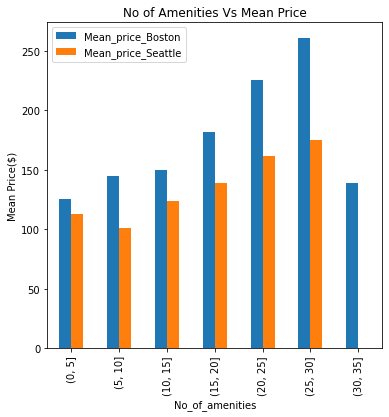

In [15]:
#Plotting Bar Graph (Data Visualization)
df.plot(x='No_of_amenities',kind='bar',figsize=(6,6)).set(ylabel='Mean Price($)', title="No of Amenities Vs Mean Price")


# Percentage Presence of each amenity: (Data Preparation)

The following cells will be used to prepare data to find out percentage presence of each amenity. It will help us in establishing relation with price by showing us what are the top amenities.

In [16]:
#getting percentage presence of each amentity present for each type of amenity in the dataframe
Amen_count_bost = (df_final_bost[amenities_list_bost].sum()/df_final_bost.shape[0]*100).sort_values(ascending=False).to_frame(name='Amenity_Count_Boston').reset_index()
Amen_count_seat = (df_final_seat[amenities_list_seat].sum()/df_final_seat.shape[0]*100).sort_values(ascending=False).to_frame(name='Amenity_Count_Seattle').reset_index()

#concatenating two dataframes of boston and seattle
amen = pd.concat([Amen_count_bost,Amen_count_seat['Amenity_Count_Seattle']],axis=1)
amen

,index,Amenity_Count_Boston,Amenity_Count_Seattle
0,WirelessInternet,95.425384,96.045050
1,Heating,94.393305,94.997381
2,Kitchen,91.603905,89.654269
3,Essentials,83.514644,85.935045
4,SmokeDetector,81.199442,84.782609
5,AirConditioning,78.688982,78.496595
6,TV,72.719665,78.365636
7,Internet,71.882845,73.624935
8,Dryer,69.065551,69.931902
9,Washer,69.037657,67.417496


[Text(0, 0.5, 'Percentage_Present'),
 Text(0.5, 1.0, 'Amenity Vs Percentage_Present')]

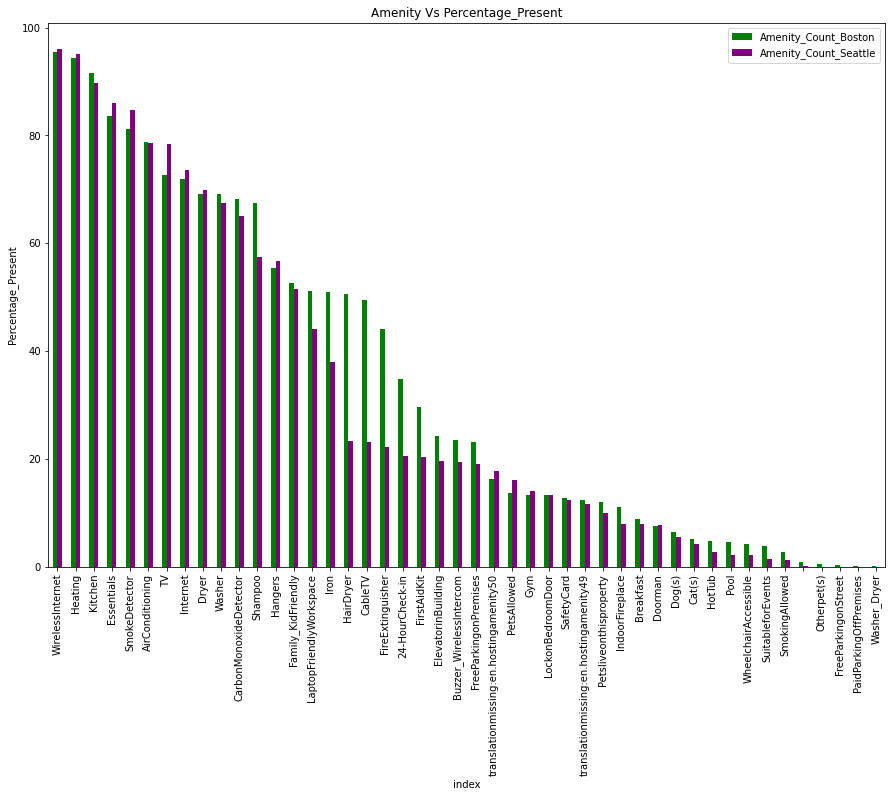

In [138]:
#plotting Amenity vs Percentage_presence (Data Visualization)
amen.plot(x='index',kind='bar',figsize=(15,10),color=['green','purple']).set(ylabel='Percentage_Present', title="Amenity Vs Percentage_Present")

Seems like Having 'Wireless Internet'(95% and 96%), 'Heating' (94% each) can garner more customers.

# Increase in Price by presence of a certain amenity:

The last bit of relation that we are trying to establish is how a certain amenity can increase the price of a listing by having it.

For this we have calculated difference of mean price of listings where a particular amenity is present and where it is not present.

Postive Bar Graph: Indicates listings prices are higher when the amenity is present than when it's not
Negative Bar Graph:  Indicates listing prices are higher when the amenity is not present than when it is present.

In [22]:
#taking intersection of two amenities list to compare prices (Data Preparation)
final_amen_list =list(set(amenities_list_bost).intersection(set(amenities_list_seat)))

In [23]:
#Preparing data for difference of mean price in presence and non presence of amenity for Boston
amen_price_bost = {}
for col in final_amen_list:
    #difference of mean price when amentity is present and when it's not present.
    amen_price_bost[col]=float(df_final_bost[df_final_bost[col]==True]['price'].mean())-float(df_final_bost[df_final_bost[col]==False]['price'].mean())
amenities_price_new_bost=[]
for keys in amen_price_bost:
    amenities_price_new_bost.append([keys,amen_price_bost[keys]])
amenity_wise_price_bost = pd.DataFrame(amenities_price_new_bost,columns=['amenities','Mean_Price_Boston'])

In [24]:
#Preparing data for difference of mean price in presence and non presence of amenity for Boston
amen_price_seat = {}
for col in final_amen_list:
    #difference of mean price when amentity is present and when it's not present.
    amen_price_seat[col]=float(df_final_seat[df_final_seat[col]==True]['price'].mean())-float(df_final_seat[df_final_seat[col]==False]['price'].mean())
amenities_price_new_seat=[]
for keys in amen_price_seat:
    amenities_price_new_seat.append([keys,amen_price_seat[keys]])
amenity_wise_price_seat = pd.DataFrame(amenities_price_new_seat,columns=['amenities','Mean_Price_Seattle'])

In [25]:
#concatenating two dataframes of boston and seattle
amen_price = pd.concat([amenity_wise_price_bost,amenity_wise_price_seat['Mean_Price_Seattle']],axis=1)
amen_price

,amenities,Mean_Price_Boston,Mean_Price_Seattle
0,LockonBedroomDoor,-57.491297,-55.284153
1,,-9.542227,0.001631
2,24-HourCheck-in,35.382325,4.283048
3,Buzzer_WirelessIntercom,28.877776,9.776989
4,PetsAllowed,31.036848,21.987843
5,Otherpet(s),-51.719127,-17.027140
6,Internet,39.845490,15.620381
7,Doorman,99.610203,73.928526
8,ElevatorinBuilding,76.689488,20.911977
9,Cat(s),-35.270058,-27.770363


Having and Gym in a Homestay can up the price by 80 while having a Pool can up the price by 44 in Boston

[Text(0, 0.5, 'Mean_price[Present-Not_present]$'), Text(0.5, 1.0, '')]

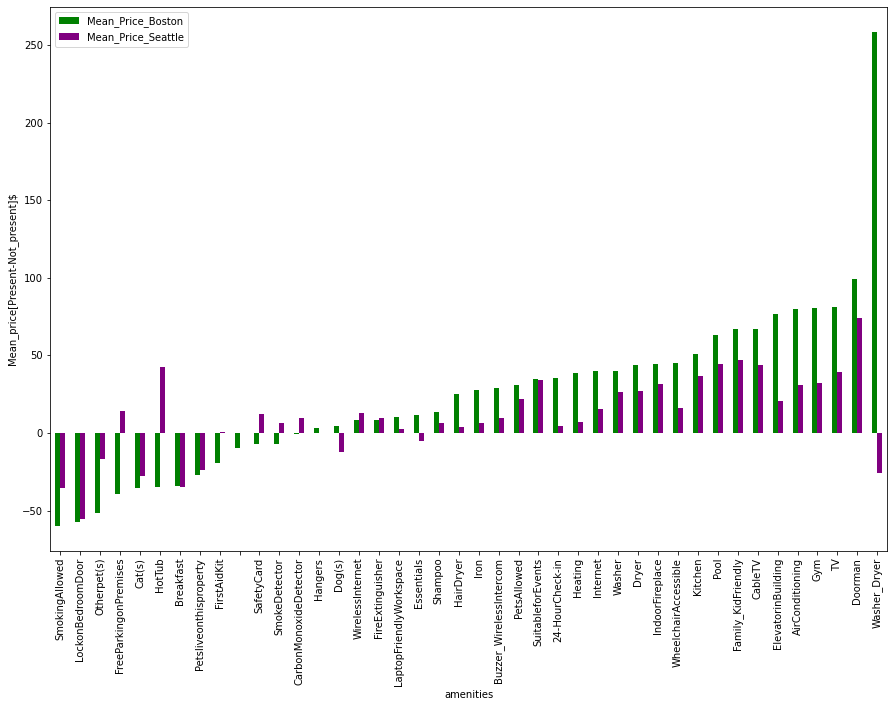

In [27]:
#plotting Amenity vs Percentage_presence (Data Visualization)
amen_price.sort_values(by=['Mean_Price_Boston'],ascending=True).plot(x='amenities',kind='bar',figsize=(15,10),color=['green','purple']).set(ylabel='Mean_price[Present-Not_present]$', title="")